In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load the dataset
file_path = '/content/Womens Clothing E-Commerce Reviews.csv'  # Adjust file path as needed
data = pd.read_csv(file_path)

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<ipython-input-4-c8005ce6162e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)
<ipython-input-4-c8005ce6162e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')


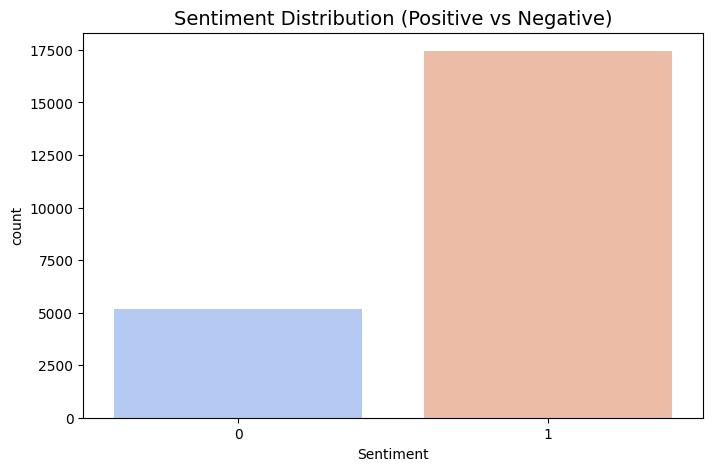

In [4]:
# Dropping rows with missing review text
data_cleaned = data.dropna(subset=["Review Text"])

# Label sentiment: Ratings 4-5 are Positive, 1-3 are Negative
data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution (Positive vs Negative)', fontsize=14)
plt.show()

**Text Vectorization Using TF-IDF**

In [5]:
# Splitting features and target
X = data_cleaned["Review Text"]
y = data_cleaned["Sentiment"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:
# Standardizing the vectorized data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Dimensionality Reduction using PCA
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled.toarray())
X_test_pca = pca.transform(X_test_scaled.toarray())

In [7]:
# Hyperparameter tuning for SVM and Random Forest
# Define hyperparameter grid
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}



In [8]:
# SVM with Grid Search
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_pca, y_train)
best_svm = grid_search_svm.best_estimator_

# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_pca, y_train)
best_rf = grid_search_rf.best_estimator_

**Training and Comparing Multiple Machine Learning Models**

Best SVM Accuracy: 87.37%
Classification Report for Best SVM:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69      1045
           1       0.89      0.95      0.92      3484

    accuracy                           0.87      4529
   macro avg       0.84      0.78      0.80      4529
weighted avg       0.87      0.87      0.87      4529

Logistic Regression Accuracy: 87.11%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68      1045
           1       0.89      0.95      0.92      3484

    accuracy                           0.87      4529
   macro avg       0.84      0.78      0.80      4529
weighted avg       0.87      0.87      0.86      4529

K-Nearest Neighbors Accuracy: 80.44%
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.61      0.43      0.50      1045
    

<ipython-input-9-c37cac31a92b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()), palette="coolwarm")


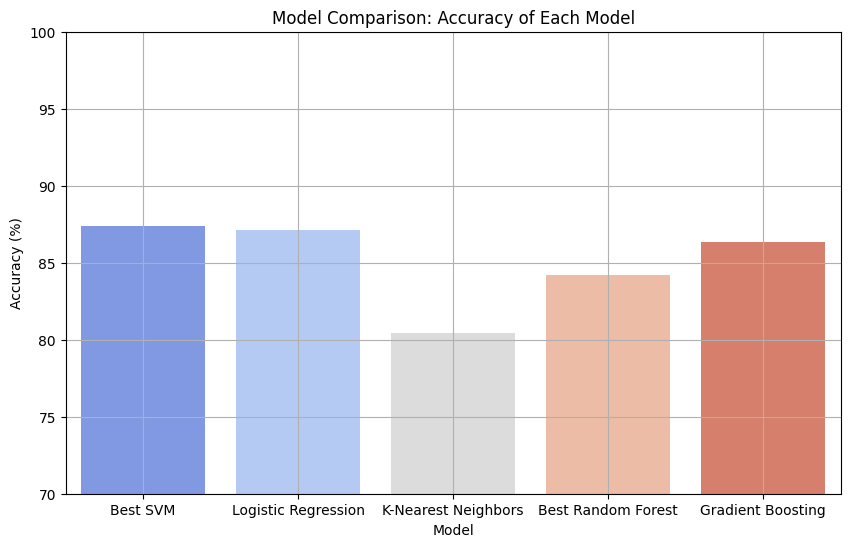

In [9]:
# Training and evaluating multiple models
models = {
    'Best SVM': SVC(C=10, kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Best Random Forest': RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate models
model_accuracy = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy[model_name] = accuracy * 100
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()), palette="coolwarm")
plt.title("Model Comparison: Accuracy of Each Model")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(70, 100)
plt.grid(True)
plt.show()

**Aspect-Based Sentiment Analysis (ABSA)**

In [10]:
# Aspect-Based Sentiment Analysis (ABSA) Placeholder
# Identify keywords or entities using NER (Named Entity Recognition) or custom logic
from sklearn.feature_extraction.text import CountVectorizer

# Example: Extracting common words as 'aspects' from reviews
vectorizer_aspects = CountVectorizer(stop_words="english", max_features=10)
X_aspects = vectorizer_aspects.fit_transform(data_cleaned['Review Text'])

# Assuming these 'aspects' are identified and sentiment classified (further implementation needed)
print(f"Top Aspects Extracted: {vectorizer_aspects.get_feature_names_out()}")


Top Aspects Extracted: ['dress' 'fabric' 'fit' 'great' 'just' 'like' 'love' 'size' 'small' 'wear']


** Sentiment Trend Analysis Over Time**

In [11]:
print(data_cleaned.columns)


Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Sentiment'],
      dtype='object')


<ipython-input-12-b70e46d33ad8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)
<ipython-input-12-b70e46d33ad8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(np.random.choice(pd.date_range(start="2023-01-01", end="2024-01-01", freq="D"), len(data_cleaned)))


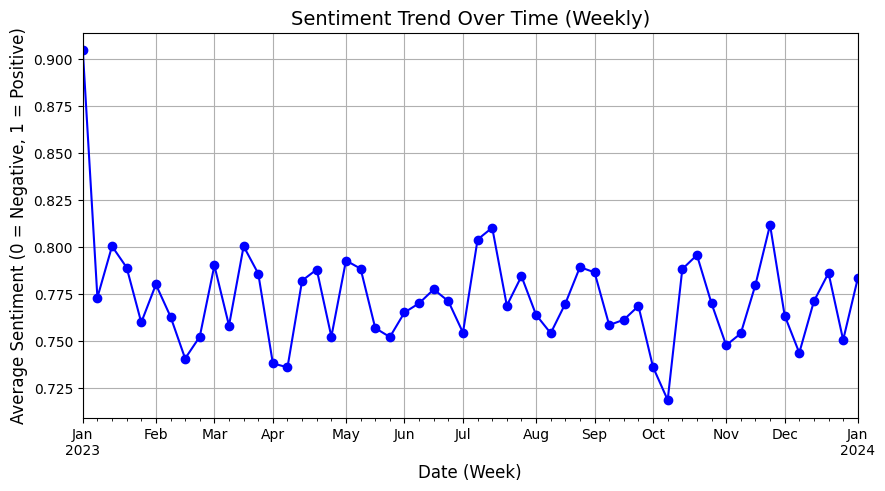

In [12]:
# Dropping rows with missing review text
data_cleaned = data.dropna(subset=["Review Text"])

# Label sentiment: Ratings 4-5 are Positive, 1-3 are Negative
data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# Generate synthetic date data (e.g., within the last year)
np.random.seed(42)

# Group sentiment data by week for smoother trend analysis
data_cleaned['Date'] = pd.to_datetime(np.random.choice(pd.date_range(start="2023-01-01", end="2024-01-01", freq="D"), len(data_cleaned)))
sentiment_trend = data_cleaned.groupby(data_cleaned['Date'].dt.to_period("W"))['Sentiment'].mean()

# Improved plot for sentiment trend
plt.figure(figsize=(10, 5))
sentiment_trend.plot(kind='line', marker='o', color='b')
plt.title('Sentiment Trend Over Time (Weekly)', fontsize=14)
plt.xlabel('Date (Week)', fontsize=12)
plt.ylabel('Average Sentiment (0 = Negative, 1 = Positive)', fontsize=12)
plt.grid(True)
plt.show()


**Customer Segmentation Using K-Means**

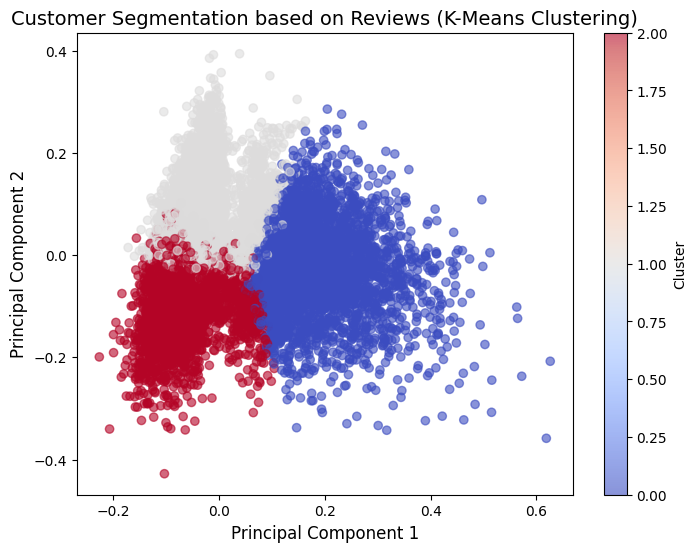

In [13]:
# Perform dimensionality reduction using PCA to visualize clusters
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca_2d = pca.fit_transform(X_train_tfidf.toarray())

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_segments = kmeans.fit_predict(X_train_tfidf)

# Visualize the clusters in 2D using PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=customer_segments, cmap='coolwarm', alpha=0.6)
plt.title('Customer Segmentation based on Reviews (K-Means Clustering)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()


**Topic Modeling Using LDA**

In [14]:
# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train_tfidf)

vectorizer = tfidf_vectorizer
# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Top words for topic #0:
['flattering', 'like', 'fit', 'saw', 'online', 'size', 'beautiful', 'store', 'love', 'dress']
Top words for topic #1:
['petite', 'short', 'waist', 'fabric', 'look', 'size', 'just', 'fit', 'like', 'dress']
Top words for topic #2:
['bought', 'little', 'wash', 'price', 'love', 'fit', 'small', 'wear', 'dress', 'size']
Top words for topic #3:
['fit', 'pants', 'dress', 'soft', 'perfect', 'wear', 'comfortable', 'jeans', 'great', 'love']
Top words for topic #4:
['wear', 'medium', 'ordered', 'shirt', 'like', 'large', 'love', 'color', 'small', 'size']
